In [6]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler

import tensorflow as tf
import setuptools._distutils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

tf.keras.backend.clear_session()

In [7]:
# import data
csv_data = pd.read_csv('../data/Road Accident Data.csv', low_memory=False)

# clean data
csv_data.loc[csv_data['Accident_Severity'] == 'Fetal', 'Accident_Severity'] = 'Fatal'

working_data = pd.DataFrame(csv_data[[
    'Day_of_Week',
    'Light_Conditions', 
    'Accident_Severity',  
    'Road_Surface_Conditions', 
    'Speed_limit',
    'Weather_Conditions',
    'Vehicle_Type'
]])

working_data.head()

,Day_of_Week,Light_Conditions,Accident_Severity,Road_Surface_Conditions,Speed_limit,Weather_Conditions,Vehicle_Type
0,Thursday,Daylight,Serious,Dry,30,Fine no high winds,Car
1,Monday,Daylight,Serious,Wet or damp,30,Fine no high winds,Taxi/Private hire car
2,Sunday,Daylight,Slight,Dry,30,Fine no high winds,Taxi/Private hire car
3,Monday,Daylight,Serious,Frost or ice,30,Other,Motorcycle over 500cc
4,Tuesday,Darkness - lights lit,Serious,Dry,30,Fine no high winds,Car


# Implement Neural Networks

In [8]:
# Create a copy of the DataFrame to avoid modifying the original data
encoded_data = working_data.copy()

# List of categorical columns to encode
categorical_columns = ['Day_of_Week', 'Light_Conditions', 'Accident_Severity', 
                        'Road_Surface_Conditions', 'Weather_Conditions', 'Vehicle_Type']

# Initialize LabelEncoder for each categorical column
label_encoders = {}

for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    encoded_data[col] = label_encoders[col].fit_transform(encoded_data[col])

# Display the encoded DataFrame
print("Encoded DataFrame:")
print(encoded_data)


Encoded DataFrame:
        Day_of_Week  Light_Conditions  Accident_Severity  \
0                 4                 4                  1   
1                 1                 4                  1   
2                 3                 4                  2   
3                 1                 4                  1   
4                 5                 1                  1   
...             ...               ...                ...   
307968            4                 4                  2   
307969            3                 3                  2   
307970            5                 4                  2   
307971            5                 3                  1   
307972            3                 4                  1   

        Road_Surface_Conditions  Speed_limit  Weather_Conditions  Vehicle_Type  
0                             0           30                   1             2  
1                             4           30                   1            13  
2                

In [9]:
# Assuming 'working_data' is your DataFrame with the required columns
data = encoded_data.copy()

# Convert categorical variables to numerical using LabelEncoder
label_encoders = {}
categorical_columns = ['Day_of_Week', 'Light_Conditions', 'Road_Surface_Conditions', 
                       'Weather_Conditions', 'Vehicle_Type']

for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

# Split data into features (X) and target variable (y)
X = data.drop('Accident_Severity', axis=1)
y = data['Accident_Severity']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train_scaled, y_train)

# Make predictions on test set
y_pred = rf_classifier.predict(X_test_scaled)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.85
Classification Report:
              precision    recall  f1-score   support

           0       0.05      0.00      0.00       831
           1       0.15      0.00      0.01      8101
           2       0.86      1.00      0.92     52663

    accuracy                           0.85     61595
   macro avg       0.35      0.33      0.31     61595
weighted avg       0.75      0.85      0.79     61595

Confusion Matrix:
[[    1     3   827]
 [    4    32  8065]
 [   14   177 52472]]


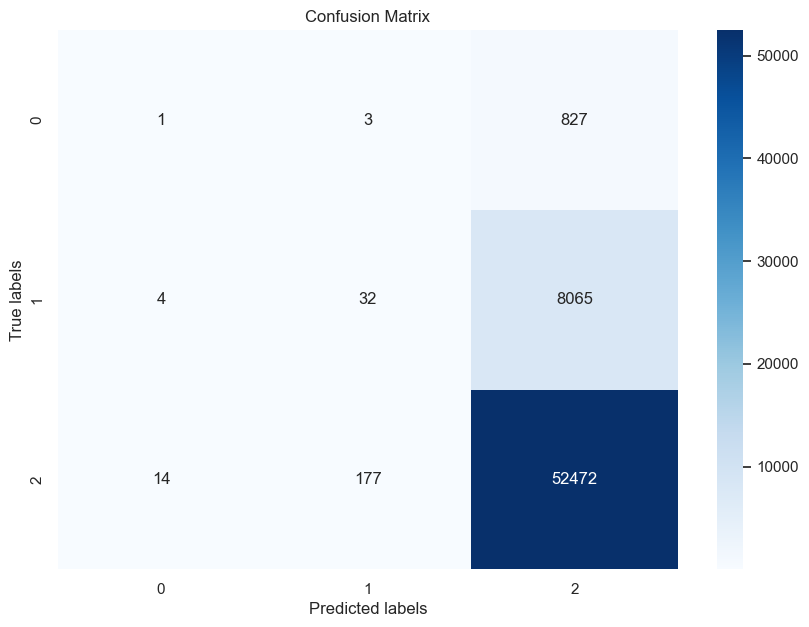

In [10]:
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sb.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [11]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Assuming 'working_data' is your DataFrame with the required columns
data = encoded_data.copy()

# Encode categorical variables
label_encoders = {}
categorical_columns = ['Day_of_Week', 'Light_Conditions', 'Road_Surface_Conditions', 
                       'Weather_Conditions', 'Vehicle_Type', 'Accident_Severity']

for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

# Convert DataFrame to float dtype (after encoding all categorical variables)
data = data.astype(float)

# Split data into features (X) and target variable (y)
X = data.drop('Accident_Severity', axis=1)
y = data['Accident_Severity']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ensure target variable y is numeric
y_train = y_train.astype(int)  # Ensure y_train is of integer dtype
y_test = y_test.astype(int)    # Ensure y_test is of integer dtype

# Initialize Neural Network model
model = Sequential()

# Add input layer and hidden layers
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dropout(0.5))  # Dropout layer to prevent overfitting
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))

# Add output layer
model.add(Dense(3, activation='softmax'))  # 3 output classes (Fatal, Serious, Slight)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
print(model.summary())

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Make predictions on test data
y_pred_prob = model.predict(X_test_scaled)  # Get the raw probabilities for each class
y_pred = np.argmax(y_pred_prob, axis=1)  # Determine the class with the highest probability

# Generate classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))  # Set zero_division=0 to handle division by zero

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


c:\school\Y1S2\SC1015\SC1015-MINI_PROJECT\.venv\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,627 (10.26 KB)

 Trainable params: 2,627 (10.26 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
6930/6930 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.8419 - loss: 0.5033 - val_accuracy: 0.8554 - val_loss: 0.4530
Epoch 2/50
6930/6930 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.8553 - loss: 0.4562 - val_accuracy: 0.8554 - val_loss: 0.4520
Epoch 3/50
6930/6930 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.8553 - loss: 0.4537 - val_accuracy: 0.8554 - val_loss: 0.4521
Epoch 4/50
6930/6930 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.8542 - loss: 0.4552 - val_accuracy: 0.8554 - val_loss: 0.4522
Epoch 5/50
6930/6930 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.8542 - loss: 0.4556 - val_accuracy: 0.8554 - val_loss: 0.4521
Epoch 6/50
6930/6930 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.8547 - loss: 0.4528 - val_accuracy: 0.8554 - val_loss: 0.4519
Epoch 7/50
6930/6930 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.8553 - loss: 0.4523 - val_accuracy: 0.8554 - val_loss: 0.4525
Epoch 8/50
6930/6930 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.8551 - lo

In [12]:
print("==========Train data==========")
# Make predictions on training data
y_train_pred_prob = model.predict(X_train_scaled)
y_train_pred = np.argmax(y_train_pred_prob, axis=1)

train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.2f}")

# Generate classification report and confusion matrix for training data
print("Training Classification Report:")
print(classification_report(y_train, y_train_pred, zero_division=1))

print("Training Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred))


print()
print("==========Test data==========")
# Make predictions on the test set
y_pred_prob = model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_prob, axis=1)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

==========Train data==========


7700/7700 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step
Training Accuracy: 0.85
Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00      3122
           1       1.00      0.00      0.00     32639
           2       0.85      1.00      0.92    210617

    accuracy                           0.85    246378
   macro avg       0.95      0.33      0.31    246378
weighted avg       0.88      0.85      0.79    246378

Training Confusion Matrix:
[[     0      0   3122]
 [     0      0  32639]
 [     0      0 210617]]

==========Test data==========
1925/1925 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
Accuracy: 0.85
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       831
           1       0.00      0.00      0.00      8101
           2       0.85      1.00      0.92     52663

    accuracy                           0.85     61595
   macro avg       0.28      0.33  

In [13]:
df = pd.DataFrame(data)

df = pd.DataFrame(data)

# Filter the DataFrame to select rows where Accident_Severity is 1.0
filtered_df = df[df['Accident_Severity'] == 2.0]

# Sample 3000 rows randomly from the filtered DataFrame
random_sample_df = filtered_df.sample(n=30, random_state=42)

print("Random Sample where Accident_Severity is 1.0:")
# print(random_sample_df)


for col in data:
    unique_values = data[col].unique()
    print(f"Unique values in '{col}': {unique_values}")
    print(f"No. of val: {data[col].value_counts()}")
    print()



Random Sample where Accident_Severity is 1.0:
Unique values in 'Day_of_Week': [4. 1. 3. 5. 0. 6. 2.]
No. of val: Day_of_Week
0.0    50529
5.0    46386
6.0    46381
4.0    45649
1.0    43918
2.0    41566
3.0    33544
Name: count, dtype: int64

Unique values in 'Light_Conditions': [4. 1. 0. 2. 3.]
No. of val: Light_Conditions
4.0    227286
1.0     60093
3.0     16528
0.0      2924
2.0      1142
Name: count, dtype: int64

Unique values in 'Accident_Severity': [1. 2. 0.]
No. of val: Accident_Severity
2.0    263280
1.0     40740
0.0      3953
Name: count, dtype: int64

Unique values in 'Road_Surface_Conditions': [0. 4. 2. 3. 1. 5.]
No. of val: Road_Surface_Conditions
0.0    208967
4.0     81479
2.0     12078
3.0      4758
1.0       374
5.0       317
Name: count, dtype: int64

Unique values in 'Speed_limit': [30. 20. 50. 40. 70. 60. 10. 15.]
No. of val: Speed_limit
30.0    200040
60.0     46826
40.0     25650
70.0     22362
50.0     10191
20.0      2899
10.0         3
15.0         2
Name: co

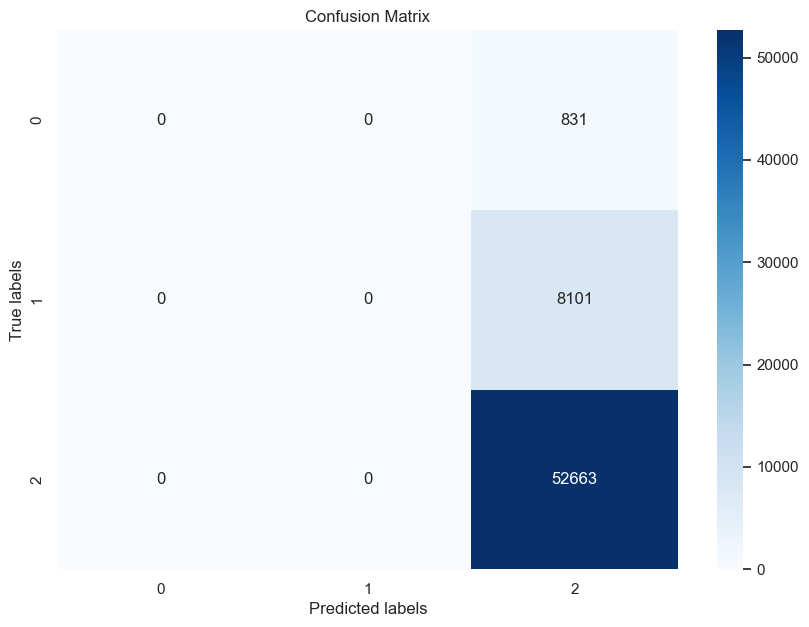

In [14]:
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sb.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()